In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [251]:
sales = pd.read_csv("C:\\Users\\USER\\Desktop\\microsoft\\module 2\\projects\\Sales_December_2019.csv", parse_dates=["Order Date"])
sales

C:\Users\USER\AppData\Local\Temp\ipykernel_3628\2958221974.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales = pd.read_csv("C:\\Users\\USER\\Desktop\\microsoft\\module 2\\projects\\Sales_December_2019.csv", parse_dates=["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [260]:
sales['Revenue'] = pd.to_numeric(sales["Quantity Ordered"], errors='coerce') * pd.to_numeric(sales['Price Each'], errors='coerce')
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",11.95
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11,"14 Madison St, San Francisco, CA 94016",14.95
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01,"549 Willow St, Los Angeles, CA 90001",7.68
25114,319668,Vareebadd Phone,1,400.00,2019-12-09,"273 Wilson St, Seattle, WA 98101",400.00
25115,319669,Wired Headphones,1,11.99,2019-12-03,"778 River St, Dallas, TX 75001",11.99


📊 Exploratory Data Analysis (EDA)
<br><br>
Now you explore patterns and distributions:
<br>
Get summary statistics: .describe()
<br>
Find total sales, average sales per product, etc.
<br>
Identify top-selling products, top categories, and top customers.
<br>
Check sales trends over time (daily, monthly, seasonal).
<br>
Identify least performing items.
<br>
Compare regions or stores if multiple exist.

In [161]:
sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,25037,25037,25037,25037,25037,25037
unique,24007,20,8,19,17306,23215
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,48,2981,22641,2981,48,48


In [262]:
grouped = sales["Revenue"].dropna().groupby(sales["Product"]).agg(["sum","mean"]).reset_index().sort_values(by = "sum", ascending=False)
grouped

,Product,sum,mean
13,Macbook Pro Laptop,1094800.00,1700.000000
18,iPhone,635600.00,700.000000
14,ThinkPad Laptop,540994.59,999.990000
9,Google Phone,429600.00,600.839161
1,27in 4K Gaming Monitor,335781.39,390.443477
3,34in Ultrawide Monitor,322611.51,381.337482
6,Apple Airpods Headphones,311850.00,151.457018
8,Flatscreen TV,199500.00,301.359517
7,Bose SoundSport Headphones,182481.75,100.930171
2,27in FHD Monitor,144740.35,150.457744


In [163]:
top_products = grouped['Product'].head()
table1 = pd.DataFrame(top_products)
table1

,Product
13,Macbook Pro Laptop
18,iPhone
14,ThinkPad Laptop
9,Google Phone
1,27in 4K Gaming Monitor


##### Checking sales over time

Daily

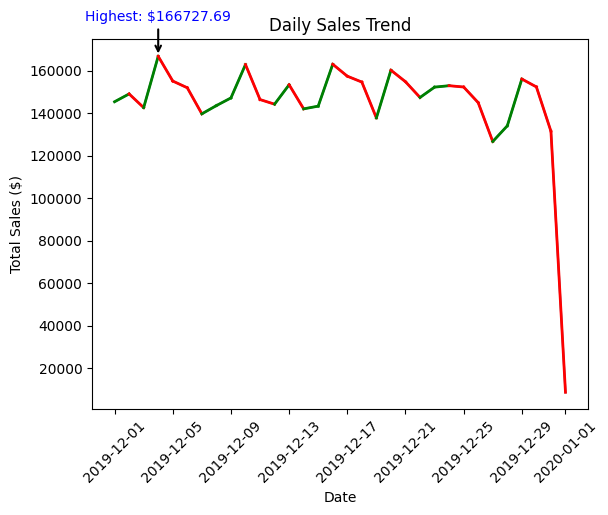

In [ ]:
idx_date = sales.set_index('Order Date')
per_day = idx_date['Revenue'].resample('D').sum()
fig,ax = plt.subplots()
ax.plot(per_day)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)  

dates = per_day.index
sales_values = per_day.values

for i in range(1, len(sales_values)):
    if sales_values[i] >= sales_values[i-1]:
        color = 'green'  
    else:
        color = 'red'    
    ax.plot(dates[i-1:i+1], sales_values[i-1:i+1], color=color, linewidth=2)

max_idx = sales_values.argmax()
max_date = dates[max_idx]
max_value = sales_values[max_idx]

ax.annotate(
    f'Highest: ${max_value:.2f}', 
    xy=(max_date, max_value), 
    xytext=(max_date, max_value + max_value*0.1),  # move text 10% above the point
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # nicer arrow
    ha='center',
    fontsize=10,
    color='blue'
)
plt.show()
fig.savefig("Daily.png", dpi = 100)


Weekly

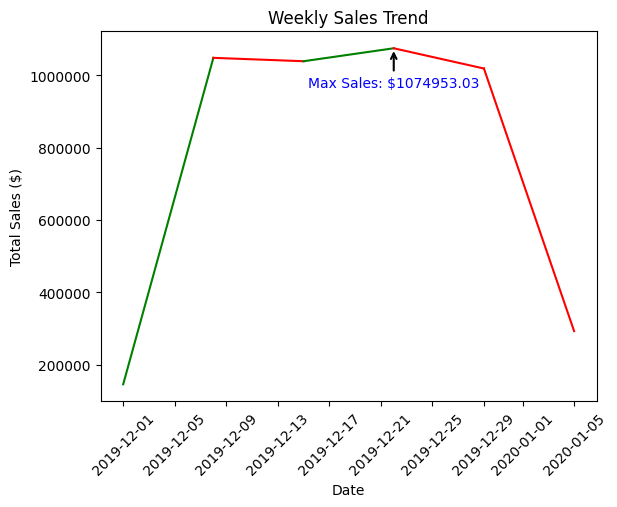

In [264]:
idx_date = sales.set_index("Order Date")
per_week = idx_date['Revenue'].resample('W').sum()
max_idx = per_week.argmax()
max_date = per_week.index[max_idx]
max_price = per_week.values[max_idx]
fig, ax = plt.subplots()
for i in range(1,len(per_week.values)):
    if per_week.values[i] < per_week.values[i-1]:
        color = 'red'
    else:
        color = 'green'
    ax.plot(per_week[i-1:i+1],color= color)
ax.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation = 45)
plt.title("Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
ax.annotate(
    f"Max Sales: ${max_price}", 
    xy=(max_date,max_price),
    xytext=(max_date, max_price-max_price*0.10),
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # nicer arrow
    ha='center',
    color = 'blue'
)
plt.show()
fig.savefig("Weekly.png", dpi = 100)

Yearly

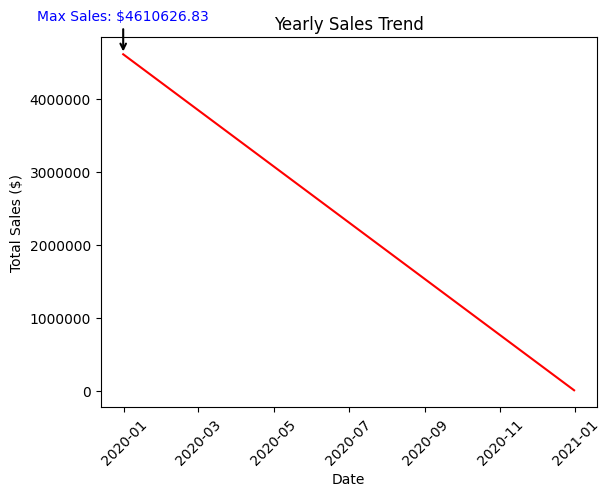

In [266]:
per_year = sales.set_index('Order Date')['Revenue'].resample('YE').sum()
fig, ax = plt.subplots()
for i in range(1,len(per_year.values)):
    if per_year.values[i] < per_year.values[i-1]:
        color = 'red'
    else:
        color = 'green'
    ax.plot(per_year[i-1:i+1],color= color)
max_idx = per_year.argmax()
max_date = per_year.index[max_idx]
max_price = per_year.values[max_idx]
ax.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation = 45)
plt.title("Yearly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
ax.annotate(
    f"Max Sales: ${max_price}", 
    xy=(max_date,max_price),
    xytext=(max_date, max_price+max_price*0.10),
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  
    ha='center',
    color = 'blue'
)
ax.ticklabel_format(style='plain', axis='y')
plt.show()
fig.savefig("Monthly.png", dpi = 100)

In [ ]:
grouped.tail()

,Product,sum,mean
12,Lightning Charging Cable,43265.30,14.95
15,USB-C Charging Cable,35622.95,11.95
17,Wired Headphones,30478.58,11.99
4,AA Batteries (4-pack),10433.28,3.84
5,AAA Batteries (4-pack),8464.69,2.99


Data Visualization
<br><br>
Use libraries like Matplotlib and Seaborn for visual patterns:
<br>
Bar charts – top 10 products by sales.
<br>
Line charts – sales trend over months.
<br>
Pie chart / donut – category-wise sales share.
<br>
Heatmaps – correlation between numerical features.
<br>
Boxplots – price or sales variation across categories.
<br>
Histogram – distribution of sales or prices.

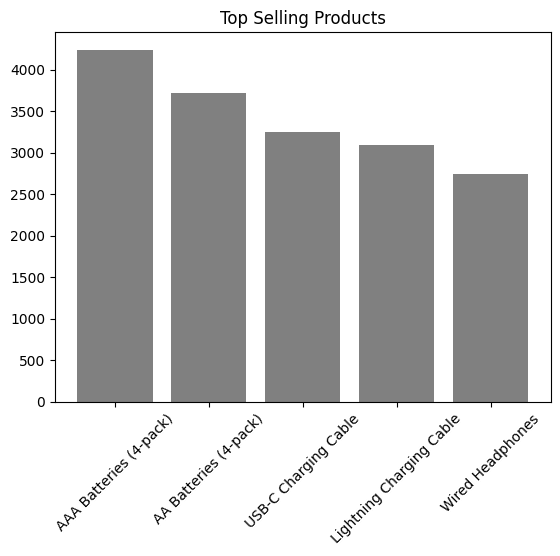

In [ ]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='coerce')
top_selling = sales['Quantity Ordered'].groupby(sales["Product"]).sum().sort_values(ascending=False).reset_index()
top5_selling = top_selling.head()
fig, ax = plt.subplots()
ax.bar(top5_selling['Product'], top5_selling['Quantity Ordered'], color = 'gray')
plt.xticks(rotation = 45)
plt.title("Top Selling Products")
plt.savefig('top-selling-products.png', dpi = 100)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_3628\3430171167.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Max Sales: {by_month[by_month.argmax()]}",


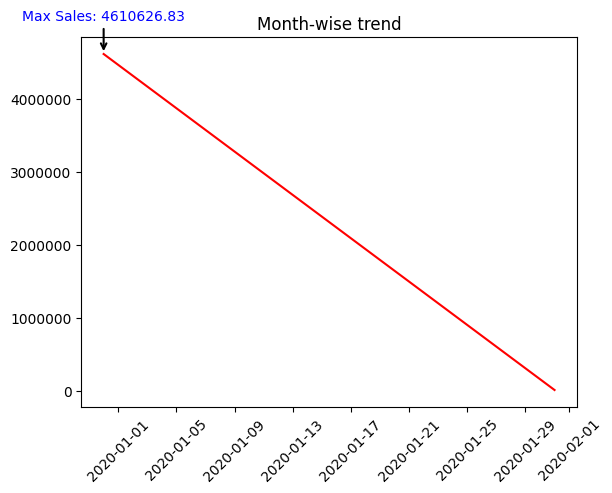

In [267]:
idx_date = sales.set_index('Order Date')
by_month = idx_date['Revenue'].resample('ME').sum()
fig,ax = plt.subplots()
for i in range(1, len(by_month.values)):
    if by_month.values[i] < by_month.values[i-1]:
        color = 'red'
    else:
        color = 'green'
    ax.plot(by_month[i-1:i+1], color = color)

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45)
plt.title("Month-wise trend")
ax.annotate(
    f"Max Sales: {by_month[by_month.argmax()]}",
    xy = (by_month.index[by_month.argmax()],by_month.values[by_month.argmax()]),
    xytext= (by_month.index[by_month.argmax()],by_month.values[by_month.argmax()]+by_month.values[by_month.argmax()]*0.10),
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  
    ha='center',
    color = 'blue'
             )
plt.savefig('Month-Wise.png', dpi = 100)
plt.show()

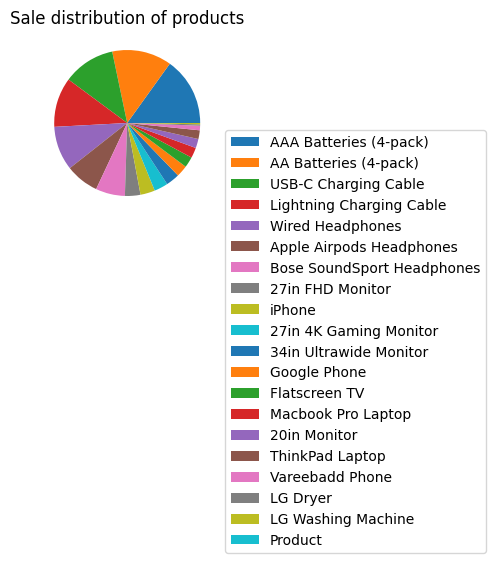

In [ ]:
plt.Figure(figsize=(10,8))
plt.pie(top_selling['Quantity Ordered'])
plt.title("Sale distribution of products")
plt.legend(top_selling['Product'], bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('sale-distribution.png', dpi = 100)
plt.show()

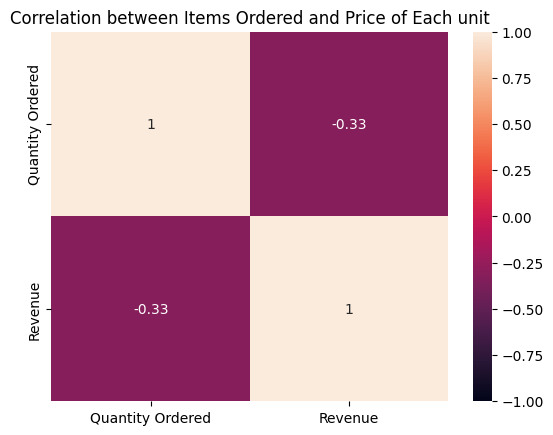

In [268]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors = 'coerce')
gc = sales.groupby(["Product"])[["Quantity Ordered", "Revenue"]].sum()
sns.heatmap(gc.corr(),vmax=1, vmin=-1, annot=True)
plt.title("Correlation between Items Ordered and Price of Each unit")
plt.savefig('corelation.png', dpi = 100)
plt.show()

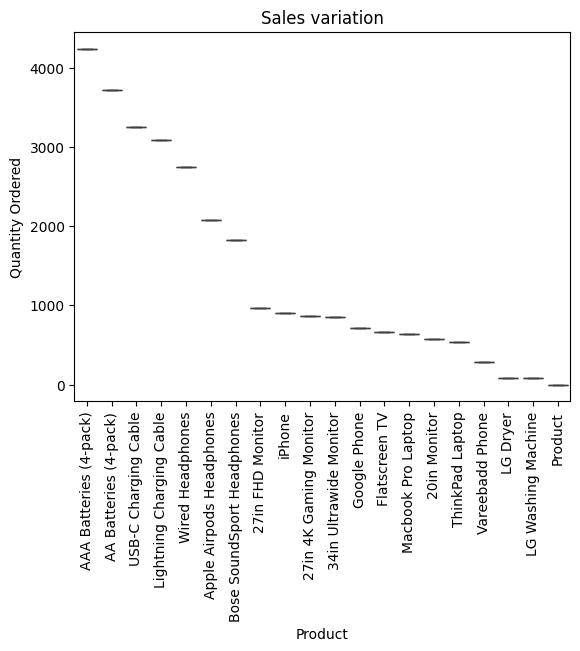

In [ ]:
sns.boxplot(x = 'Product', y = 'Quantity Ordered', data = top_selling)
plt.title("Sales variation")
plt.xticks(rotation = 90)
plt.savefig('sales-variation.png', dpi = 100)
plt.show()

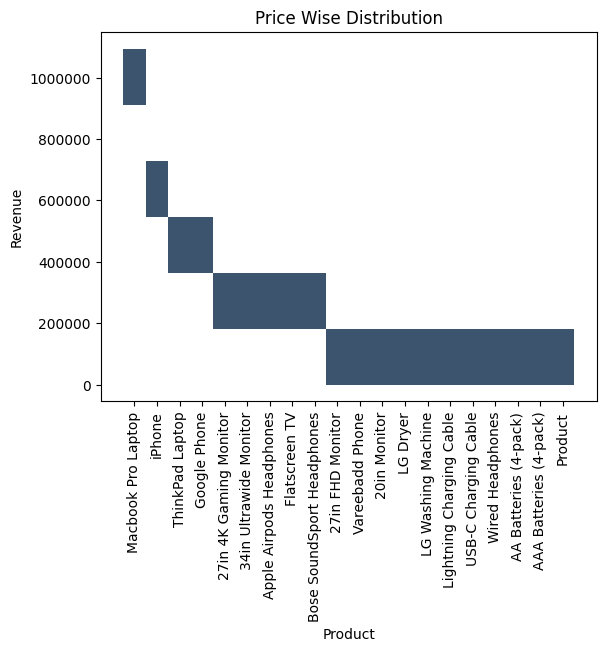

In [270]:
top_prices = sales['Revenue'].groupby(sales["Product"]).sum().sort_values(ascending=False).reset_index()
sns.histplot(x = 'Product', y = 'Revenue', data = top_prices)
plt.xticks(rotation = 90)
plt.title("Price Wise Distribution")
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('pricewise.png', dpi = 100)
plt.show()

Business Insights
<br><br>
From EDA and visualization, you’ll summarize key takeaways:
<br>
Which products or categories are most profitable.
<br>
Which months or days have high or low sales.
<br>
Which regions/customers contribute most to revenue.
<br>
Any seasonal trends (e.g., more sales in holidays).
<br>
Are there any outliers or unusual drops in sales.
<br>

In [168]:
top5_selling

,Product,Quantity Ordered
0,AAA Batteries (4-pack),4240.0
1,AA Batteries (4-pack),3718.0
2,USB-C Charging Cable,3251.0
3,Lightning Charging Cable,3089.0
4,Wired Headphones,2748.0


##### Least Ordered Items

In [199]:
least_ordered = list(top_selling.tail()['Product'].reset_index()['Product'].values)[::-1]
least = pd.DataFrame(least_ordered,index=range(1,len(least_ordered)+1)).rename({0: 'Product Name'}, axis='columns')
least

,Product Name
1,Product
2,LG Washing Machine
3,LG Dryer
4,Vareebadd Phone
5,ThinkPad Laptop


##### Least Revenue Generated Dates

In [271]:
sales["Order Date"] = pd.to_datetime(sales["Order Date"], errors='coerce').dt.date
Lowest_date = sales.groupby("Order Date")['Revenue'].sum().sort_values(ascending=True)
pd.DataFrame(Lowest_date.head()).rename({'Price Each' : "Revenue"}, axis='columns')

,Revenue
Order Date,
2020-01-01,8670.29
2019-12-27,126628.05
2019-12-31,131454.30
2019-12-28,134015.50
2019-12-19,137732.67


##### Holiday Sales Analysis

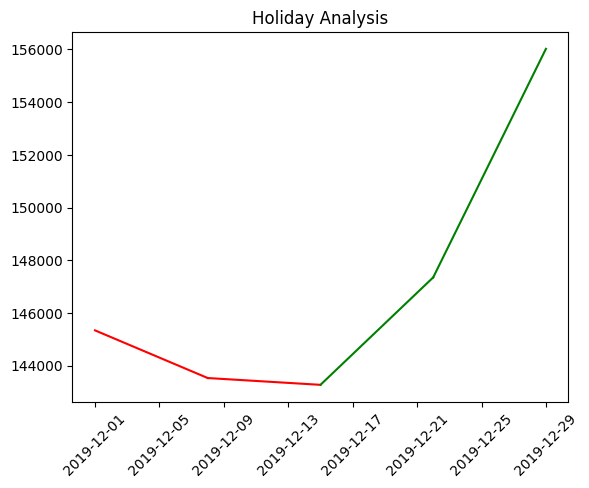

In [272]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors='coerce')
holiday_sales = sales[sales['Order Date'].dt.day_of_week>5]
holiday_sales = holiday_sales.groupby("Order Date")['Revenue'].sum()
fig, ax = plt.subplots()
for i in range(1,len(holiday_sales.values)):
    if holiday_sales.values[i] > holiday_sales.values[i-1]:
        color = 'green'
    else:
        color = 'red'
    ax.plot(holiday_sales[i-1:i+1], color = color)
plt.title("Holiday Analysis")
plt.xticks(rotation = 45)
plt.savefig("Holiday-Sales-Analysis.png", dpi = 100)
plt.show()


In [248]:
sales["revenue"] = pd.to_numeric(sales["Quantity Ordered"], errors='coerce')*pd.to_numeric(sales["Price Each"], errors='coerce')
q1 = sales['revenue'].groupby(sales["Product"]).sum().quantile(0.25)
q3 = sales['revenue'].groupby(sales["Product"]).sum().quantile(0.75)
IQR = q3-q1
lower_bound = q1 - (IQR*1.5)
upper_bound = q3 + (IQR*1.5)
outliers = sales[(sales['revenue'] < lower_bound) | (sales['revenue'] > upper_bound)]
outliers

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,revenue
